# Name: Bajarani Ulvi
# SID: 20539914

## The final exam of CSCI 6368
## Deadline: 04/27/2021

# 

# 1. (25) Understanding Support Vector Machines
## https://www.youtube.com/watch?v=ik7E7r2a1h8
## This question comes exactly from the above video with my own set of points.
## Given the following set of points (with their yi labels) in 2-D 
## (1,0) and (3,0) belong to yi= +1 (i.e., positive examples)
## (2,2) and (2,3) belong to yi= - 1 (i.e., negative examples)
### A. Draw the data in 2-D with the labels.
### B. Find intuitively the line equation with the largest margin and write its equation as y = mx + b
### C. Rewrite the equation in the famous form w.x + b = 0 where w and x are vectors and . is the dot product. 
### D. Scale the equation such that margin width = 2/||w||
### E. Find the supportiveness (a values) of all the 4 points.

## Answer 1A

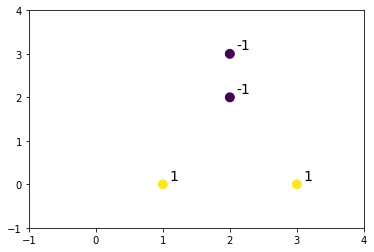

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X = np.array([[1, 0],[3, 0],[2, 2],[2, 3]])
Y = [1,1,-1,-1]
labels = [1,1,-1,-1]

Z_for_labels = [1, 3, 2, 2]
X_for_labels = [0, 0, 2, 3]
labels_for_labels = [1,1,-1,-1]

fig, ax = plt.subplots()
ax.scatter(Z_for_labels, X_for_labels)

for i, txt in enumerate(labels_for_labels):
    ax.annotate(txt, (Z_for_labels[i]+0.1, X_for_labels[i]+0.1), fontsize=14)

clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

b_1 = clf.support_vectors_[0]
yy_down = a * xx + (b_1[1] - a * b_1[0])
b_minus_1 = clf.support_vectors_[1]
yy_up = a * xx + (b_minus_1[1] - a * b_minus_1[0])

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=80)

plt.axis('tight')

plt.xlim([-1, 4])
plt.ylim([-1, 4])
plt.xticks([-1,0,1,2,3,4])

plt.show()

## Answer 1B

In [2]:
print()
print("The y=mx+b equation for +1 label is: " + str(a) + " * x + (" + str((b_1[1] - a * b_1[0])) + ")")
print()
print("The y=mx+b equation for -1 label is: " + str(a) + " * x + (" + str((b_minus_1[1] - a * b_minus_1[0])) + ")")
print()
print("The y=mx+b equation for hyperplain is: " + str(a) + " * x + (" + str(((b_1[1]+b_minus_1[1])/2) - a * ((b_1[0]+b_minus_1[0])/2)) + ")")
print()


The y=mx+b equation for +1 label is: 0.00038392628615299847 * x + (1.999232147427694)

The y=mx+b equation for -1 label is: 0.00038392628615299847 * x + (-0.00038392628615299847)

The y=mx+b equation for hyperplain is: 0.00038392628615299847 * x + (0.9994241105707705)



## Answer 1C

In [3]:
print("W is")
print()
print(str(clf.coef_))
print()
print("W^T is")
print()
print(str(np.transpose(clf.coef_)))
print()
print("X is")
print()
print(str(X))
print()
print("b is")
print()
print(str(clf.intercept_))
print()


W is

[[ 3.840000e-04 -1.000192e+00]]

W^T is

[[ 3.840000e-04]
 [-1.000192e+00]]

X is

[[1 0]
 [3 0]
 [2 2]
 [2 3]]

b is

[0.99936]



### So, we can write the formula of the hyperplane as:

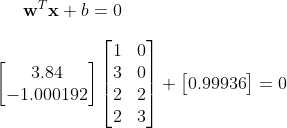

## Answer 1D

The margin of the hyperplane is: 1.9996159263427646


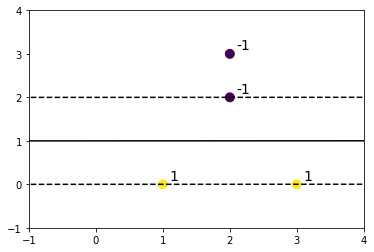

In [4]:
print("The margin of the hyperplane is: " + str(2 / np.sqrt(np.sum(clf.coef_ ** 2))))

X = np.array([[1, 0],[3, 0],[2, 2],[2, 3]])
Y = [1,1,-1,-1]
labels = [1,1,-1,-1]

Z_for_labels = [1, 3, 2, 2]
X_for_labels = [0, 0, 2, 3]
labels_for_labels = [1,1,-1,-1]

fig, ax = plt.subplots()
ax.scatter(Z_for_labels, X_for_labels)

for i, txt in enumerate(labels_for_labels):
    ax.annotate(txt, (Z_for_labels[i]+0.1, X_for_labels[i]+0.1), fontsize=14)

clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

b_1 = clf.support_vectors_[0]
yy_down = a * xx + (b_1[1] - a * b_1[0])
b_minus_1 = clf.support_vectors_[1]
yy_up = a * xx + (b_minus_1[1] - a * b_minus_1[0])

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=80)

plt.axis('tight')

plt.xlim([-1, 4])
plt.ylim([-1, 4])
plt.xticks([-1,0,1,2,3,4])

plt.show()

## Answer 1E

In [5]:
print("The Lagrange multipliers are: " + str(np.abs(clf.dual_coef_)))
print("The number of 0 Lagrange multipliers are: " + str(len(X)-len(clf.dual_coef_[0])))

The Lagrange multipliers are: [[0.500096 0.249856 0.25024 ]]
The number of 0 Lagrange multipliers are: 1


# 2. (25) Confusion Matrix
## A classifier is used on 30 male patients to screen for cancer. Having cancer is considered TP and not having cancer is considered TN. Of the 30 males 19 are healthy and 11 have cancer.
## The classification gives the following results: 8 cancer patients are classified as having cancer (TP). 2 healthy patients are classified as having cancer (FP). 17 healthy patients are classified as healthy (TN). 17 healthy patients are classified as healthy (TN). 3 cancer patients are classified as healthy (FN)

### A. Draw the 2x2 table.
### B. Calculate the overall accuracy after giving the formula.
### C. Calculate the Precision and recall values.
### D. Calculate the F value.
### E. Which measure is more important, and why?

## Answer 2A

In [6]:
from matplotlib import colors
import numpy as np
import itertools

TP_initial=19
TN_initial=11
TP_result=8
FP_result=2
TN_result=17
FN_result=3
Array_of_results = np.array([[TP_result,FN_result],[FP_result,TN_result]])

cmap = colors.ListedColormap(['white'])

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix'):

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)


    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red",
                     fontsize='xx-large')


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

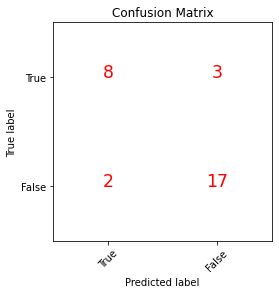

In [7]:
plot_confusion_matrix(cm           = Array_of_results,
                      target_names = ['True', 'False'],
                      title        = "Confusion Matrix")

## The formulas for Answer 2B, 2C, 2D

In [8]:
def accuracy_of_results(TP_result,FP_result,TN_result,FN_result):
    return (TP_result+TN_result)/(TP_result+FP_result+FN_result+TN_result)
def positive_precision(TP_result,FP_result):
    return TP_result/(TP_result+FP_result)
def negative_precision(TN_result,FN_result):
    return TN_result/(TN_result+FN_result)
def positive_recall(TP_result,FN_result):
    return TP_result/(TP_result+FN_result)
def negative_recall(TN_result,FP_result):
    return TN_result/(TN_result+FP_result)
def F_measure(precision,recall):
    return 2/((1/precision)+(1/recall))

## Answer 2B

In [9]:
print("Accuracy of the results is " + str(accuracy_of_results(TP_result,FP_result,TN_result,FN_result)))
print("Which is equal to " + str(100*accuracy_of_results(TP_result,FP_result,TN_result,FN_result)) + "%")

Accuracy of the results is 0.8333333333333334
Which is equal to 83.33333333333334%


## Answer 2C

In [10]:
print("Positive precision is " + str(positive_precision(TP_result,FP_result)))
print("Which is equal to " + str(100*positive_precision(TP_result,FP_result)) + "%")
print("Negative precision is " + str(negative_precision(TN_result,FN_result)))
print("Which is equal to " + str(100*negative_precision(TN_result,FN_result)) + "%")
print("Positive recall is " + str(positive_recall(TP_result,FN_result)))
print("Which is equal to " + str(100*positive_recall(TP_result,FN_result)) + "%")
print("Negative recall is " + str(negative_recall(TN_result,FP_result)))
print("Which is equal to " + str(100*negative_recall(TN_result,FP_result)) + "%")


Positive precision is 0.8
Which is equal to 80.0%
Negative precision is 0.85
Which is equal to 85.0%
Positive recall is 0.7272727272727273
Which is equal to 72.72727272727273%
Negative recall is 0.8947368421052632
Which is equal to 89.47368421052632%


## Answer 2D

In [11]:
print("F-Measure is equal to " + str(F_measure(positive_precision(TP_result,FP_result),positive_recall(TP_result,FN_result))))

F-Measure is equal to 0.7619047619047619


## Answer 2E

### In my opinion, the F-measure is the most important, since it combines both recall and precision


### 

# 3. (25) Data Augmentation
## Given one image of utb.jpg, generate (using Keras or any package of your choice) 30 or more variants of the image through the following DIP operations:
### • Scaling
### • Flipping
### • Rotations
### • Translation (shifting)
## The program/notebook must allow the use to input the image. Check the site at for a nice tutorial.
## https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

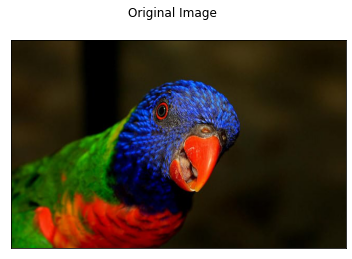

In [12]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

img = load_img('utb.jpg')

plt.suptitle("Original Image")
plt.xticks([])
plt.yticks([])
plt.imshow(img)



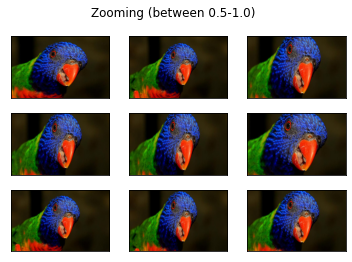

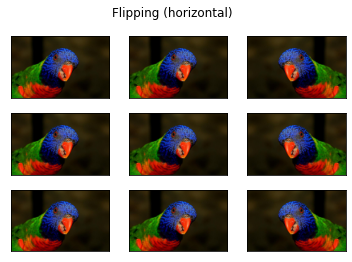

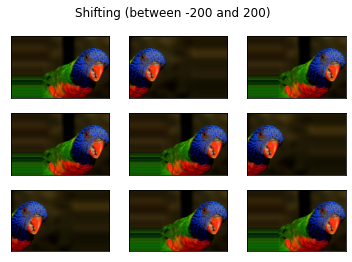

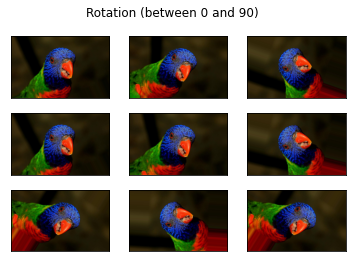

In [13]:
data = img_to_array(img)

samples = np.expand_dims(data, 0)
image_labels = ["Zooming (between 0.5-1.0)", "Flipping (horizontal)",
          "Shifting (between -200 and 200)", "Rotation (between 0 and 90)"]
datagen = [ImageDataGenerator(zoom_range=[0.5,1.0]), ImageDataGenerator(horizontal_flip=True),
           ImageDataGenerator(width_shift_range=[-200,200]), ImageDataGenerator(rotation_range=90)]

for j in range(len(datagen)):
    it = datagen[j].flow(samples, batch_size=1)
    for i in range(9):
        
        plt.suptitle(image_labels[j])
        
        plt.subplot(330 + 1 + i)
        plt.xticks([])
        plt.yticks([])
        
        batch = it.next()
        
        image = batch[0].astype('uint8')
        
        plt.imshow(image)
        

    plt.show()

# 
# 
# 

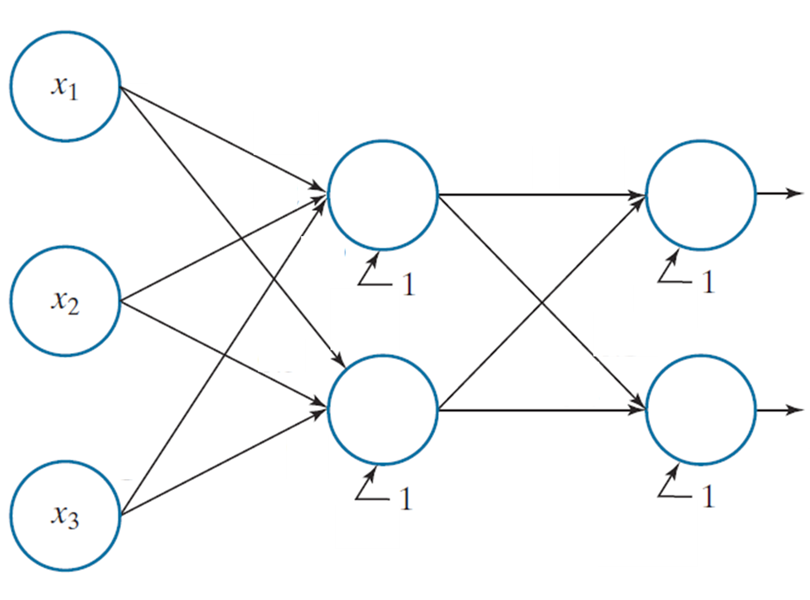

# 4. (25) Feedforward Fully Connected NN: for the small, fully connected, feedforward net with labeled weights, biases, and outputs. The activation function is sigmoid. Find the activation values at layer 2 and 3. Show all the details.:

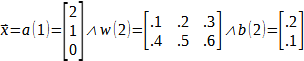

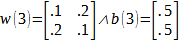

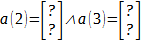

In [14]:
import math

x_vector=np.array([[2],
          [1],
          [0]])

second_weight=np.array([[.1,.2,.3],[.4,.5,.6]])

second_bias=np.array([[.2],
          [.1]])

third_weight=np.array([[.1,.2],[.2,.1]])

third_bias=np.array([[.5],
          [.5]])

layer_2_calculation = np.dot(second_weight,x_vector)+second_bias
print("The computational results in the second layer are:")
print("First neuron " + str(layer_2_calculation[0]))
print("Second neuron " + str(layer_2_calculation[1]))
layer_2_output = np.copy(layer_2_calculation)
print()
for i in range(len(layer_2_output)):
    layer_2_output[i] = 1/(1+math.exp(-1*layer_2_calculation[i]))
print("The outputs of the second layer are:")
print("First neuron " + str(layer_2_output[0]))
print("Second neuron " + str(layer_2_output[1]))
print()
layer_3_calculation = np.dot(third_weight,layer_2_output)+third_bias
print("The computational results in the third layer are:")
print("First neuron " + str(layer_3_calculation[0]))
print("Second neuron " + str(layer_3_calculation[1]))
print()
layer_3_output = np.copy(layer_3_calculation)
for i in range(len(layer_3_output)):
    layer_3_output[i] = 1/(1+math.exp(-1*layer_3_calculation[i]))
print("The outputs of the third layer are:")
print("First neuron " + str(layer_3_output[0]))
print("Second neuron " + str(layer_3_output[1]))


The computational results in the second layer are:
First neuron [0.6]
Second neuron [1.4]

The outputs of the second layer are:
First neuron [0.64565631]
Second neuron [0.80218389]

The computational results in the third layer are:
First neuron [0.72500241]
Second neuron [0.70934965]

The outputs of the third layer are:
First neuron [0.67370763]
Second neuron [0.67025744]
